# Cartopy and the matplotlib interface

[Introduction](../../introduction.ipynb) > Cartopy and the matplotlib interface

## Purpose

The purpose of this section is to give you an overview of cartopy's matplotlib interface and its documentation. This will help you to:
 
 * apply cartopy's matplotlib interface to your own situation/application
 * navigate cartopy's documentation effectively

Note: There is more to cartopy than the matplotlib interface, but it is the best way to *see* what cartopy is doing.

## Cartopy's documentation

https://scitools.org.uk/cartopy/docs/latest/

Cartopy makes use of the powerful PROJ.4, numpy and shapely libraries and includes a programatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.


## Cartopy Projections and other reference systems

In Cartopy, each projection is a class.
Most classes of projection can be configured in projection-specific ways, although Cartopy takes an opinionated stance on sensible defaults.

Let's create a Plate Carree projection instance.

To do so, we need cartopy's crs module. This is typically imported as ``ccrs`` (Cartopy Coordinate Reference Systems).

In [1]:
import cartopy.crs as ccrs

Cartopy's projection list tells us that the Plate Carree projection is available with the ``ccrs.PlateCarree`` class:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

**Note:** we need to *instantiate* the class in order to do anything projection-y with it!


In [2]:
ccrs.PlateCarree()

## Drawing a map

Cartopy optionally depends upon matplotlib, and each projection knows how to create a matplotlib Axes (or AxesSubplot) that can represent itself.

The Axes that the projection creates is a [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes). This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.

We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

<IPython.core.display.Javascript object>


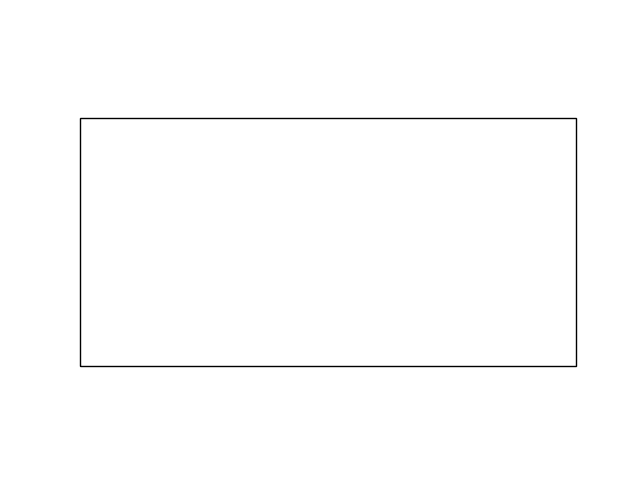

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

That was a little underwhelming, but we can see that the Axes created is indeed one of those GeoAxes[Subplot] instances.

One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the ``coastlines`` method. With no arguments, it will add the Natural Earth ``1:110,000,000`` scale coastline data to the map.

<IPython.core.display.Javascript object>


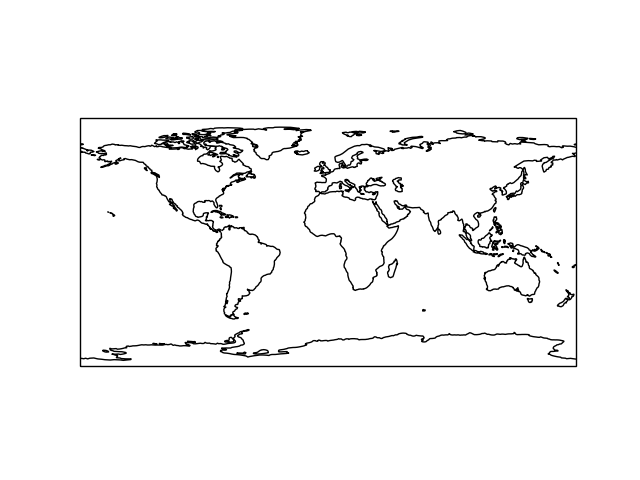

In [4]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the ```plt.subplots``` function could be used:

<IPython.core.display.Javascript object>


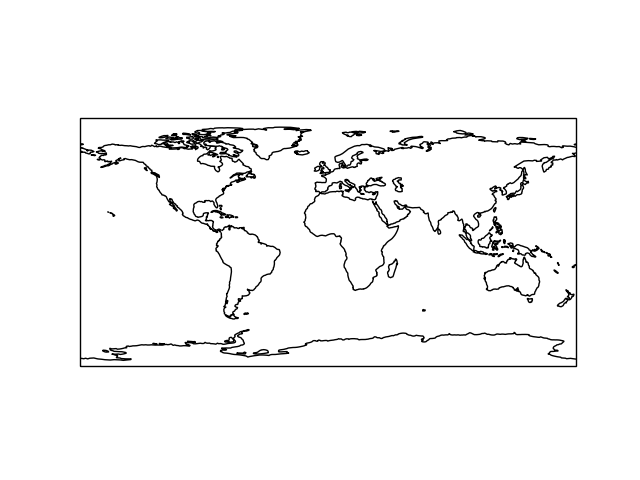

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()

**Exercise 2.1:** Navigate to the cartopy docs for PlateCarree. Using the information there, create a global Plate Carree map with coastlines that is centered on the dateline (180 degrees longitude), rather than the Greenwich Prime meridian.

In [ ]:
# EXERCISE 2.1:



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 2.1</b></summary>
<pre>
plt.figure()
pc_180 = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=pc_180)
ax.coastlines()
plt.show()
</pre>
</details>

## Useful methods of a GeoAxes

The [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes) class adds a number of useful methods.

Let's take a look at:

 * [set_global](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) - zoom the map out as much as possible
 * [set_extent](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent) - zoom the map to the given bounding box
 

 * [gridlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.graticule) - add a graticule (and optionally labels) to the axes
 * [coastlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) - add Natural Earth coastlines to the axes
 * [stock_img](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) - add a low-resolution Natural Earth background image to the axes
 
 
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) - add an image (numpy array) to the axes
 * [add_geometries](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries) - add a collection of geometries (Shapely) to the axes

<IPython.core.display.Javascript object>


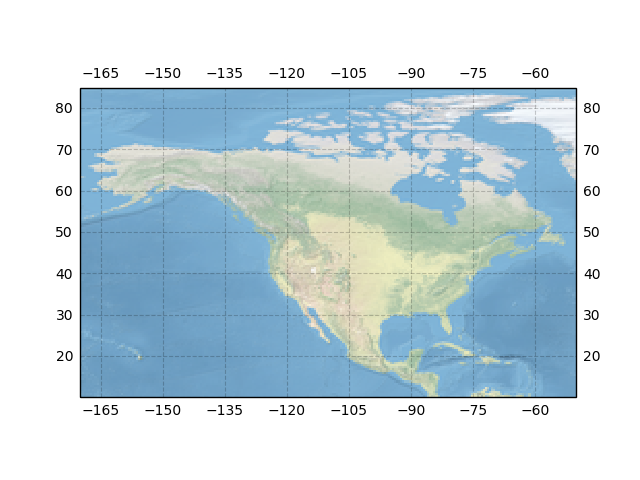

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-170, -50, 10, 80])
ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
ax.stock_img()

It'd be nice to have state boundaries and a higher resolution image here. There are built-in tools for doing this in cartopy, but let's start with the manual approach...

A higher resolution image [from Natural Earth](https://www.naturalearthdata.com/downloads/50m-raster-data/50m-natural-earth-2/) is available in ``../resources/natural-earth-2/global.png``.
Matplotlib can read PNGs out of the box, so let's use that. Alternatives for loading images include pillow, scikit-image, etc.

In [7]:
img = plt.imread('../resources/natural-earth-2/global.png')
print(img.shape)

(1000, 2000, 3)


A shapefile containing the US state boundaries [from Natural Earth](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) is available in ``../resources/states/states.shp``.

There are a number of ways of loading a shapefile, Fiona is one particularly fast approach, but geopandas and pyshp are equally valid.

In [8]:
import fiona
import shapely.geometry as sgeom

shpfile = '../resources/states/states.shp'
with fiona.open(shpfile) as records:
    geometries = [sgeom.shape(shp['geometry'])
                  for shp in records]

Now that we've made use of these tools to give us an image (numpy array) and a list of Shapely geometries, let's re-create that map and include our new data.

<IPython.core.display.Javascript object>


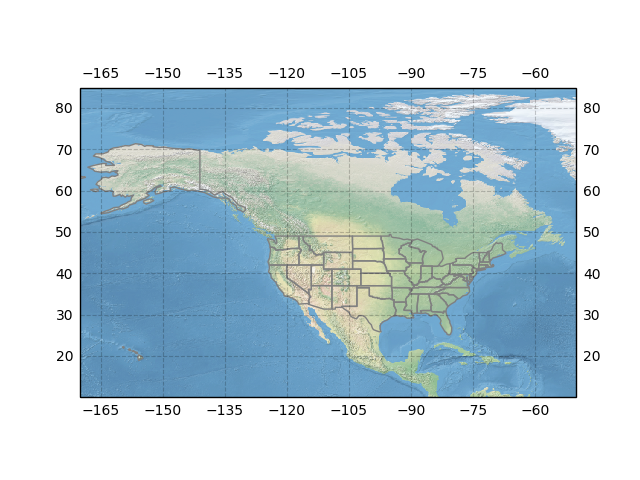

In [9]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-170, -50, 10, 80])
ax.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')

ax.imshow(img, origin='upper',
          extent=[-180, 180, -90, 90],
          transform=ccrs.PlateCarree())

ax.add_geometries(geometries, ccrs.PlateCarree(),
                  edgecolor='gray', facecolor='none')

There are some important things to note:

1. We are doing more work than we strictly need to here. Cartopy already has the ability to draw States via its [Feature interface](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html).


2. We are leveraging the power of matplotlib with this interface, we don't need to re-learn terms for how to style things. We can use the exact same syntax as we do with matplotlib (e.g. ``edgecolor``, ``facecolor``, ``linestyle``).


3. When we added data to the Axes, we specified both the data to plot **and** the coordinate system of that data using the ``transform`` keyword argument.


## Why it is important to specify the *coordinate system* of *the data* as well as the *projection* of *the map*

You've now seen that the map's projection is defined with the ``projection`` keyword argument when constructing an Axes. You've also seen that when data is added to the Axes it requires coordinate system via the ``transform`` keyword argument.

> The single most important concept in cartopy is that *it is designed* to project your data for you.<br>
> **On the whole, cartopy will do the right thing when it comes to poles, anti-meridians, interpolation and map boundaries.**


The coordinate reference system can be used to control how the coordinates of your data are interpreted.

On the sphere there are infinitely many ways to draw a line between two points. The two most common ways of drawing a line between two points on the sphere are:

 * as the shortest straight line on the sphere (Geodetic) 
 * as a straight line in projected (cartesian) space

Let's visualize these by drawing a line between New York and Honolulu.

<IPython.core.display.Javascript object>


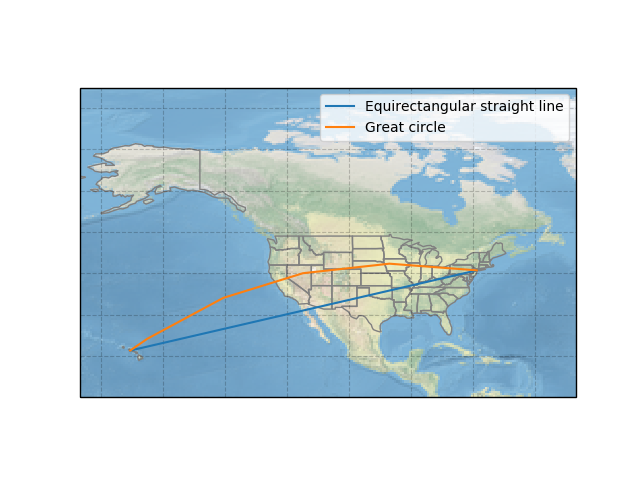

In [10]:
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)


def new_york_to_honolulu(ax):
    lons = [new_york['lon'], honolulu['lon']]
    lats = [new_york['lat'], honolulu['lat']]

    ax.plot(lons, lats, transform=ccrs.PlateCarree(),
            label='Equirectangular straight line')

    ax.plot(lons, lats, transform=ccrs.Geodetic(),
            label='Great circle')

    ax.legend()
    
    
import cartopy.feature
    
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

Let's take exactly the same code, but change the projection of the map.
How about choosing a projection that represents great circles out of New York as straight lines.

**Question: ** What class of projection would serve this purpose?
<div style="height: 40em;">&nbsp;</div>


<IPython.core.display.Javascript object>


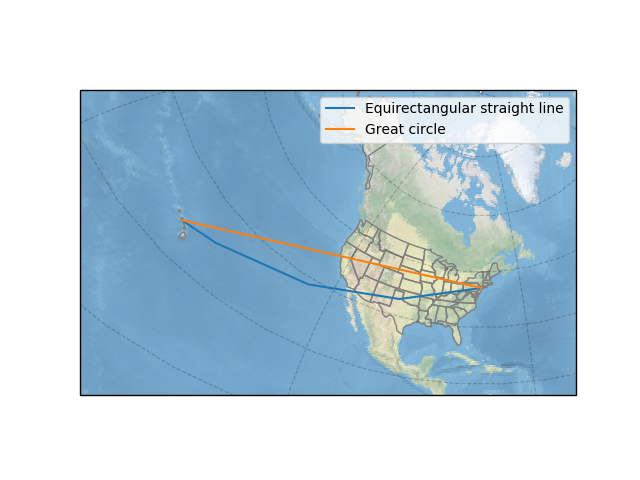

In [11]:
ny_stereo = ccrs.Stereographic(
    central_longitude=new_york['lon'],
    central_latitude=new_york['lat'])

plt.figure()
ax = plt.axes(projection=ny_stereo)
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

Notice how **the *map projection* is independent of the *data's coordinate system*** (we didn't need to change the code that adds the data to the map).

This is a core principle of cartopy, it gives *you* map projection portability, and *cartopy* enough context to project your data for you.

#### The downside of automatic projection

Whilst cartopy tends to do the right thing when it comes to wraparounds and singularities,
the big downsides of cartopy's automatic re-projection functionality are performance, and that it isn't easily controlled.

For example, the lines in the previous plots are noticably low-resolution.
This is demonstrating that cartopy operates with straight-line segments, rather than true parametric curves (such as Bézier curves).
This effectively means that there is an interpolation stage along the curve to approximate it as straight line segments.

Cartopy's interpolation "threshold" is currently defined in the map projection definition (the "target" CRS), and can currently only be influenced by subclassing the projection in question. This interface is highly likely to change in the future, but for now:

<IPython.core.display.Javascript object>


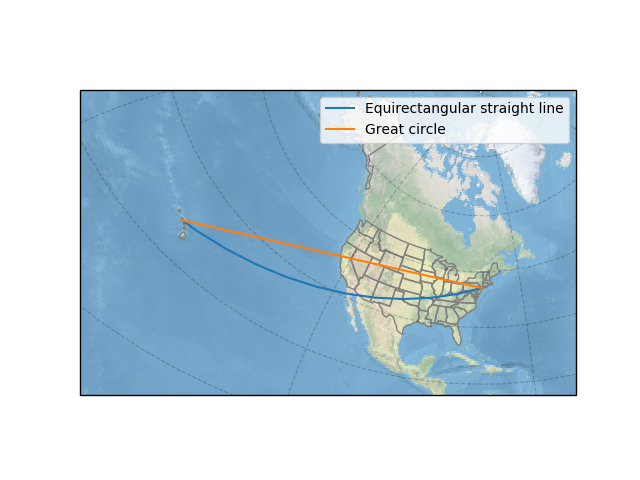

In [12]:
class HigherResStereo(ccrs.Stereographic):
    @property
    def threshold(self):
        # Give the interpolation 10x more fidelity.
        return super().threshold / 10


ny_stereo = HigherResStereo(
    central_longitude=new_york['lon'],
    central_latitude=new_york['lat'])

plt.figure()
ax = plt.axes(projection=ny_stereo)
ax.set_extent([-170, -50, 10, 80])

ax.gridlines(color='black', alpha=0.2, linestyle='--')
ax.stock_img()
ax.add_feature(cartopy.feature.STATES, edgecolor='gray')
new_york_to_honolulu(ax)

![Around the world in 80 days](../static/around_the_world.jpg)

Let's get to the main theme of the topic: **Around the world in 80 days**



**Exercise 2.2**: Phileas Fogg plans to travel around the world in 80 days.
He plans to depart from London, and his main stops are planned to be: Suez, Bombay, Calcutta, Hong-Kong, Yokohama, San Fransisco, New York City, London.
Draw a map showing a high-level route of the planned journey by joining together these locations with great circles.

In [13]:
# Some approximate locations of each of the cities are provided.
places = {'London': {'lon': -0.1278, 'lat': 51.5074},
          'Suez': {'lon': 32.5498, 'lat': 29.9668},
          'Bombay': {'lon': 72.8777, 'lat': 19.0760},
          'Calcutta': {'lon': 88.3639, 'lat': 22.5726},
          'Hong Kong': {'lon': 114.1095, 'lat': 22.3964},
          'Yokohama': {'lon': 139.6380, 'lat': 35.4437},
          'San Fransisco': {'lon': -122.4194, 'lat': 37.7749},
          'New York City': {'lon': -74.0060, 'lat': 40.7128},
         }

<IPython.core.display.Javascript object>


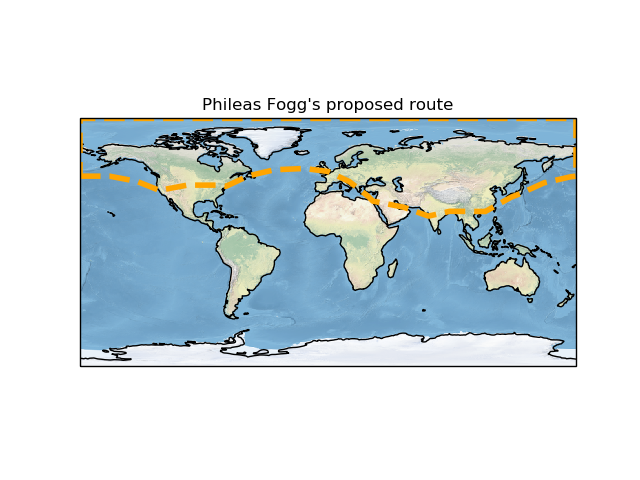

In [14]:
# EXERCISE 2.2:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

lons, lats = zip(*[
    (places[place]['lon'], places[place]['lat'])
     for place in destinations])

ax.stock_img()
ax.set_title("Phileas Fogg's proposed route")
ax.plot(lons, lats,
        linestyle='--', color='orange', linewidth=4,
        transform=ccrs.Geodetic())



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 2.2</b></summary>
<pre>
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
destinations = [
    'London', 'Suez', 'Bombay', 'Calcutta', 'Hong Kong',
    'Yokohama', 'San Fransisco', 'New York City', 'London']

lons, lats = zip(*[
    (places[place]['lon'], places[place]['lat'])
     for place in destinations])

ax.stock_img()
ax.set_title("Phileas Fogg's proposed route")
ax.plot(lons, lats,
        linestyle='--', color='orange', linewidth=4,
        transform=ccrs.Geodetic())
</pre>
</details>

The route we have created here is the shortest possible route between the given way-points, but in practice Fogg plans to travel by boat down the Suez Canal and around Southeast Asia.

[Wikipedia has an image](https://commons.wikimedia.org/wiki/File:Around_the_World_in_Eighty_Days_map.png) of the actual route taken (available in ``../resources/640px-Around_the_World_in_Eighty_Days_map.png``):

![](../resources/640px-Around_the_World_in_Eighty_Days_map.png)


**AIM: ** Let's georeference this image so that we can dispay our great-circle based route on the same map.


**Question: ** What projection *could* this image be in, and why? (note: there is no right answer - it could be one of many projections)
<div style="height: 40em;">&nbsp;</div>

After a bit of digging, it turns out that this images is derived from [another image on Wikipedia](https://commons.wikimedia.org/wiki/File:BlankMap-World.png), whose projection [is documented as](https://commons.wikimedia.org/wiki/File:BlankMap-World.png):

 > the Robinson projection, compressed at latitude direction by factor 0.95623, centered on the meridian circa 11°15' to east from Greenwich Prime Meridian

**Exercise 2.3**: Navigate to the cartopy documentation for the Robinson projection. Draw a Robinson map (with coastlines) that represents the "centered on the meridian circa 11°15' (11.25 degrees) to east from Greenwich Prime Meridian" part of this definition.

<IPython.core.display.Javascript object>


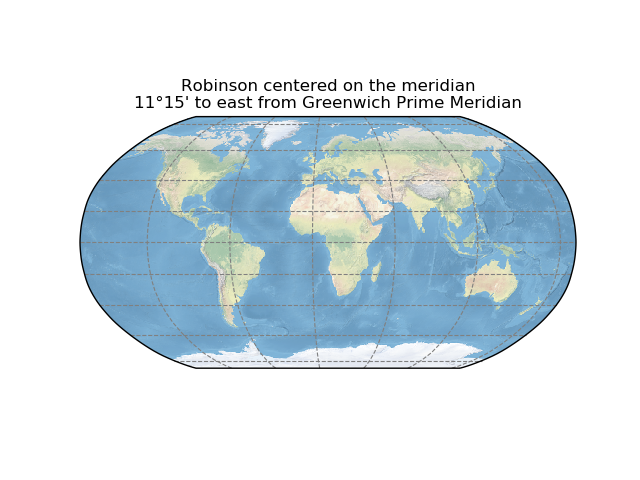

Text(0.5,1,"Robinson centered on the meridian\n11°15' to east from Greenwich Prime Meridian")

In [15]:
# EXERCISE 2.3:
plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=11.25))

ax.stock_img()
ax.gridlines(color='gray', linestyle='--')
ax.set_title("Robinson centered on the meridian\n"
             "11°15' to east from Greenwich Prime Meridian")



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 2.3</b></summary>
<pre>
plt.figure()
ax = plt.axes(projection=ccrs.Robinson(central_longitude=11.25))

ax.stock_img()
ax.gridlines(color='gray', linestyle='--')
ax.set_title("Robinson centered on the meridian\n"
             "11°15' to east from Greenwich Prime Meridian")
</pre>
</details>

Unfortunately, it is clear that the Around the World map has been cropped compared to our global map (where is Antarctica!?), and the extents of the cropping appear to be undocumented. This kind of problem is not uncommon, and it means we are going to need to guess the extents of the image in order to georeference it.
 
In [``appendix/image_geolocator.py``](../appendix/image_geolocator.py) there is a script that uses matplotlib's RectangleSelector to allow us to geolocate the image's extents.

**Exercise 2.4**: Run the image_geolocator.py script, and align the Wikipedia image with the underlying map.

 * What is the extent of the image?
 * What is the coordinate system of these extents?
 * Looking at appendix/imge_geolocator.py, how was the image added to the cartopy map?

*Extension*: Using the extents calculated and your knowledge of matplotlib, add the image from
``../resources/640px-Around_the_World_in_Eighty_Days_map.png`` to the map produced in the above **Exercise 2.3**.

<IPython.core.display.Javascript object>


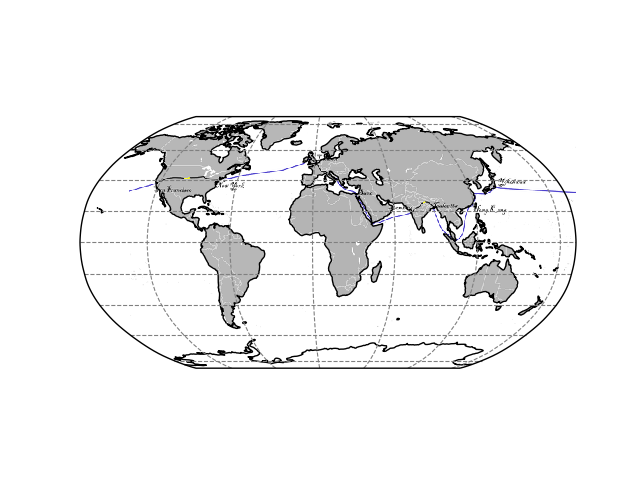

In [18]:
# EXERCISE 2.4:
extent = [-13636707, 17044670, -6308712, 8565930]

plt.figure()

rob = ccrs.Robinson(central_longitude=11.25)
ax = plt.axes(projection=rob)

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
img = plt.imread('../resources/640px-Around_the_World_in_Eighty_Days_map.png')
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()



<details>
    <summary style="margin-top: 1em; margin-left: 1em;"><b>Click to show solution for 2.4</b></summary>
<pre>
extent = extent = [-13636707, 17044670,
                   -6308712, 8565930]

plt.figure()

rob = ccrs.Robinson(central_longitude=11.25)
ax = plt.axes(projection=rob)

ax.gridlines(color='gray', linestyle='--')
ax.coastlines()
img = plt.imread('../resources/640px-Around_the_World_in_Eighty_Days_map.png')
ax.imshow(img, extent=extent, transform=rob, origin='upper')
ax.set_global()
</pre>
</details>

## Questions?

### Has this helped you to:
    
 * apply cartopy's matplotlib interface to your own situation/application
 * navigate cartopy's documentation effectively

Back to [Introduction](../introduction.ipynb), or continue to [Geospatial Data](geospatial_data.ipynb).